In [1]:
import gillespy2 as gp2
import stochss_compute as sssc

In [2]:
import sys
sys.path.insert(1, '../test/unit_tests/')
import gillespy2_models as models

In [3]:
import multiprocessing as mp

In [4]:
from distributed import Client

In [5]:
dask = Client()

2023-02-18 15:48:30,637 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-02-18 15:48:30,662 - distributed.scheduler - INFO - State start
2023-02-18 15:48:30,668 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:38473
2023-02-18 15:48:30,668 - distributed.scheduler - INFO -   dashboard at:            127.0.0.1:8787
2023-02-18 15:48:30,689 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:39441'
2023-02-18 15:48:30,694 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:33189'
2023-02-18 15:48:30,697 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:42693'
2023-02-18 15:48:30,700 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:42313'
2023-02-18 15:48:31,120 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:44723', name: 1, status: init, memory: 0, pro

In [6]:
port = dask.scheduler.addr.split(':')[2]
port

'38473'

In [7]:
import asyncio

In [8]:
async def _sssc():
    kwargs = {
        'dask_scheduler_port': port
    }
    await sssc.start_api(**kwargs)

In [9]:
process = mp.Process(target=asyncio.run, args=(_sssc(),))

In [10]:
process.start()

/home/mdip/.python/cpython/Lib/multiprocessing/process.py:125: RuntimeWarning: coroutine '_sssc' was never awaited
  del self._target, self._args, self._kwargs


In [42]:
def converging_pathways(parameter_values=None):
    model = gp2.Model(name="Michaelis_Menten")

    o = gp2.Species(name="L_ornithine", initial_value=0)
    c = gp2.Species(name="carbamoyl_phosphate", initial_value=0)
    cit = gp2.Species(name="citrulline", initial_value=0)

    model.add_species([o, c, cit])

    c = gp2.Parameter(name="c", expression=3)
    k_plus = gp2.Parameter(name="k_plus", expression=5)
    k_minus = gp2.Parameter(name="k_minus", expression=2)

    model.add_parameter([c, k_plus, k_minus])

    flux1 = gp2.Reaction(
            name="flux1",
            reactants=None, 
            products={'L_ornithine': 1},
            rate='c'
        )

    flux2 = gp2.Reaction(
            name="flux2",
            reactants=None, 
            products={'carbamoyl_phosphate': 1},
            rate='c'
        )

    combine = gp2.Reaction(
            name="combine",
            reactants={'L_ornithine': 1, 'carbamoyl_phosphate': 1}, 
            products={'citrulline': 1},
            rate='k_plus'
        )

    dissolve = gp2.Reaction(
            name="dissolve",
            reactants={'citrulline': 1}, 
            products={'L_ornithine': 1, 'carbamoyl_phosphate': 1},
            rate='k_minus'
        )

    # Add the Reactions to the Model.
    model.add_reaction([flux1, flux2, combine, dissolve])

    # Define the timespan of the model.
    tspan = gp2.TimeSpan.linspace(t=1000, num_points=1000)
    
    # Set the timespan of the Model.
    model.timespan(tspan)
    return model

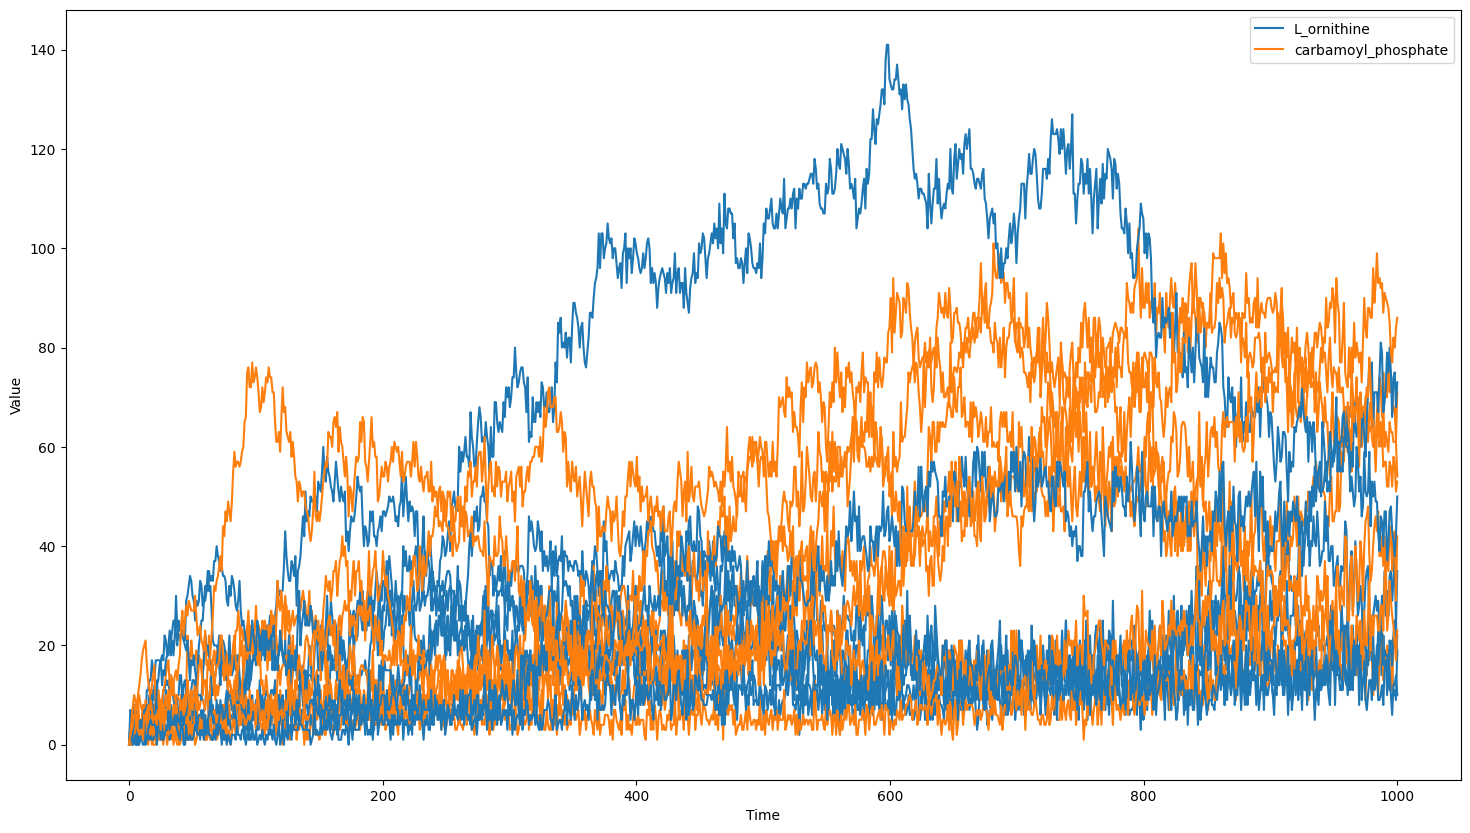

In [44]:
model = converging_pathways()
results = model.run(number_of_trajectories=7)
results.plot(included_species_list=['L_ornithine'])
results.plot(included_species_list=['carbamoyl_phosphate'])

In [31]:
sim = sssc.RemoteSimulation(create_michaelis_menten(), host='localhost')
results = sim.run()

2023-02-18 16:01:51,720 - distributed.scheduler - INFO - Receive client connection: Client-778cbc35-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:01:51,720 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57710


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-18 16:02:02,985 - distributed.scheduler - INFO - Receive client connection: Client-7e43c828-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:02,986 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:37870
2023-02-18 16:02:02,988 - distributed.worker - INFO - Run out-of-band function 'scheduler_task_state'
2023-02-18 16:02:02,998 - distributed.scheduler - INFO - Remove client Client-7e43c828-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:02,998 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:37870; closing.
2023-02-18 16:02:02,999 - distributed.scheduler - INFO - Remove client Client-7e43c828-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:02,999 - distributed.scheduler - INFO - Close client connection: Client-7e43c828-afcf-11ed-9b46-d7d19d105abb


Simulation is running. Downloading results when complete......


2023-02-18 16:02:08,009 - distributed.scheduler - INFO - Receive client connection: Client-814257fa-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:08,010 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:37890
2023-02-18 16:02:08,012 - distributed.worker - INFO - Run out-of-band function 'scheduler_task_state'
2023-02-18 16:02:08,022 - distributed.scheduler - INFO - Remove client Client-814257fa-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:08,022 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:37890; closing.
2023-02-18 16:02:08,023 - distributed.scheduler - INFO - Remove client Client-814257fa-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:08,023 - distributed.scheduler - INFO - Close client connection: Client-814257fa-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:13,032 - distributed.scheduler - INFO - Receive client connection: Client-8440e60d-afcf-11ed-9b46-d7d19d105abb
2023-02-18 16:02:13,034 - distributed.core - INFO - Starting est

Results ready. Fetching.......


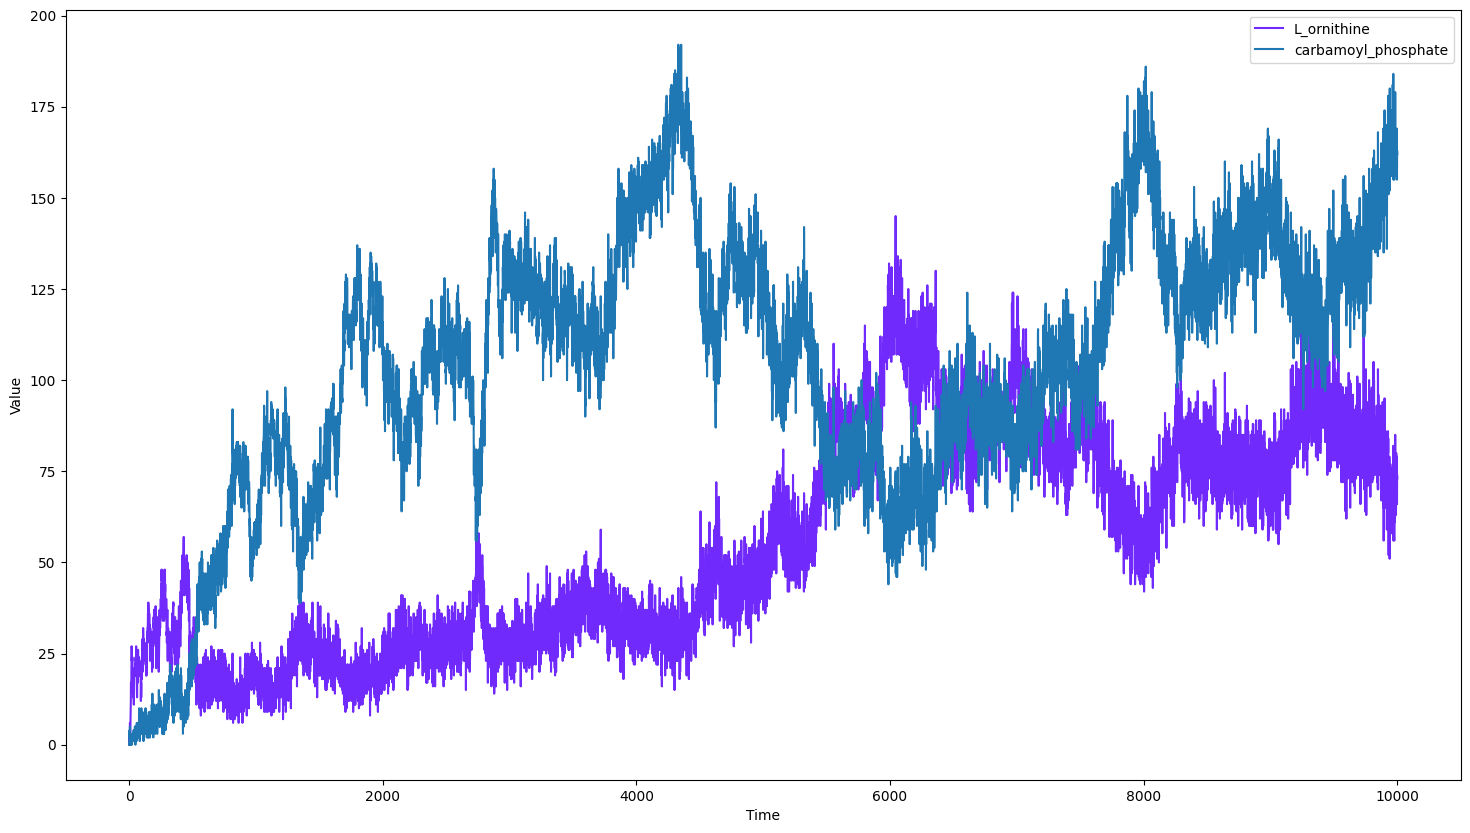

In [32]:
results.plot(included_species_list=['L_ornithine', 'carbamoyl_phosphate'])

In [33]:
process.terminate()

In [34]:
dask.close()

2023-02-18 16:08:49,754 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:39441'. Reason: nanny-close
2023-02-18 16:08:49,755 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-18 16:08:49,756 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:33189'. Reason: nanny-close
2023-02-18 16:08:49,757 - distributed.worker - INFO - Stopping worker at tcp://127.0.0.1:40389. Reason: nanny-close
2023-02-18 16:08:49,757 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-18 16:08:49,758 - distributed.core - INFO - Connection to tcp://127.0.0.1:38473 has been closed.
2023-02-18 16:08:49,758 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:42693'. Reason: nanny-close
2023-02-18 16:08:49,759 - distributed.worker - INFO - Stopping worker at tcp://127.0.0.1:44723. Reason: nanny-close
2023-02-18 16:08:49,759 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-1